# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who:** Adults from a dataset measuring sleep health and lifestyle behaviors.

**What:** We're analyzing how lifestyle factors such as physical activity, stress, and BMI relate to quality of sleep and sleep disorders like insomnia and sleep apnea.

**How:** Using exploratory data analysis and basic visualizations (e.g., histograms, bar plots) in pandas and matplotlib, possibly leading to classification models if we were to predict sleep conditions.

**Who**: Patients from the stroke dataset who are at risk based on lifestyle and clinical factors.  
**What**: We want to analyze which variables (like age, glucose level, hypertension, etc.) contribute most to stroke risk.  
**How**: Using classification models (e.g., decision tree, logistic regression) and visualizations to highlight high-risk profiles.

# 3. Homework - work with your own data

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Quick look at structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Preview the data
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

Duplicate rows: 0


In [11]:
df.describe(include="all")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [12]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [14]:
df['BMI Category'] = df['BMI Category'].fillna(df['BMI Category'].mode()[0])


In [15]:
print(df['Age'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]


In [16]:
df_encoded = pd.get_dummies(df, columns=["Gender", "Occupation", "Sleep Disorder"], drop_first=True)
df_encoded.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,Overweight,126/83,77,4200,...,False,False,False,False,False,False,False,True,False,False
1,2,28,6.2,6,60,8,Normal,125/80,75,10000,...,False,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,Normal,125/80,75,10000,...,False,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,Obese,140/90,85,3000,...,False,False,False,False,True,False,False,False,False,True
4,5,28,5.9,4,30,8,Obese,140/90,85,3000,...,False,False,False,False,True,False,False,False,False,True


In [17]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

- The data are usable after preprocessing.
- We handled missing values in the BMI column using the median.
- One-hot encoding was applied to categorical variables like Gender and Occupation.
- There is a slight class imbalance in the Sleep Disorder category — most entries are "None", with fewer for "Sleep Apnea" and "Insomnia".

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

5,110 rows and 12 columns
- Target variable: `stroke` (0 = no stroke, 1 = stroke)
- Mixture of numerical (e.g., age, avg_glucose_level, bmi) and categorical (e.g., gender, work_type, smoking_status) features
- `.describe()` showed high variance in glucose levels and age distribution skewing older for positive stroke cases

Duplicate Rows:  
No exact duplicates were found in the dataset.

Missing Values:  
201 missing values in the `bmi` column. We plan to use **median imputation** to handle these.

Inconsistent Data:  
- Some patients are marked as "Unknown" for smoking status. We will either treat this as a separate category or consider removal depending on model impact.
- A few infants in the dataset (age = 0.08) are labeled as working adults, which might require further cleaning.

**Encoding Categorical Variables**:  
We plan to use **one-hot encoding** for variables like `work_type`, `residence_type`, and `smoking_status`.

---

Conclusions:
- Are the data usable?** Yes — with some preprocessing (handling missing BMI and encoding categoricals), the data is fit for analysis.
- Do you need to modify or correct the data?** Yes — we will fill missing `bmi` values using median and encode string labels numerically.
- Is there class imbalance?** Yes — the dataset is imbalanced, with far fewer stroke cases than non-stroke. We may use **SMOTE** (Synthetic Minority Over-sampling Technique) to address this before model training.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

I plan to graph a bar chart showing stroke occurrence by age group and hypertension status**. This will help highlight how risk increases with age and other clinical indicators. We'll use `matplotlib` or `seaborn` to create this visualization and discuss it in context with our analysis.


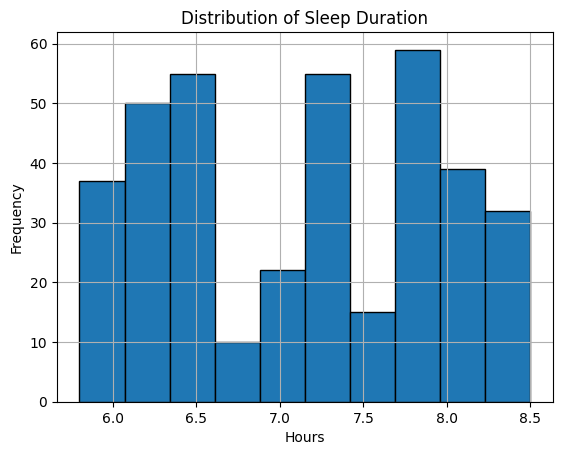

In [18]:
import matplotlib.pyplot as plt

# Example: Histogram of Sleep Duration
plt.hist(df['Sleep Duration'], bins=10, edgecolor='black')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()